#Project Based CLO 4

Topik Tugas

Implementation of Ensemble Method on Classification Task

Anggota Kelompok

Muhammad Ilham Hakim Somantri - 1301210330

Muhammad Faqih Abdussalam - 1301213056

Raihan Fathul Bayan - 1301213272

# **Latar Belakang**

Dataset yang digunakan dalam analisis ini berasal dari Survei Pemeriksaan Kesehatan dan Gizi Nasional (NHANES) di Amerika Serikat, sebuah inisiatif yang dikelola oleh Pusat Pengendalian dan Pencegahan Penyakit (CDC) melalui pusat Statistik Kesehatan Nasional (NCHS). NHANES dirancang untuk mengumpulkan informasi yang komprehensif tentang kesehatan dan gizi dari berbagai kelompok penduduk, dengan fokus pada orang dewasa dan anak-anak. Proses pengumpulan data melibatkan wawancara langsung, pemeriksaan fisik oleh tim medis, dan tes laboratorium yang mencakup pengambilan sampel darah dan urin.


Tujuan dari klasifikasi dataset ini adalah untuk memprediksi atau mengklasifikasikan usia (age) responden berdasarkan subset fitur yang telah dipilih dari dataset NHANES. Dengan menggunakan data fisiologis, pilihan gaya hidup, dan penanda biokimia yang dihipotesiskan memiliki korelasi kuat dengan usia, analisis ini bertujuan untuk memahami hubungan antara karakteristik tertentu dari responden dengan usia mereka. Dengan kata lain, kita mencoba untuk mengembangkan model klasifikasi yang dapat memprediksi kelompok usia seseorang berdasarkan informasi yang terkandung dalam fitur-fitur yang dipilih tersebut. Pemahaman ini dapat memberikan wawasan lebih dalam tentang bagaimana faktor-faktor tertentu dapat terkait dengan penuaan atau distribusi usia dalam populasi yang diwakili oleh dataset NHANES.


# **Tujuan Utama**

Tujuan utama dari proyek ini adalah mengembangkan model klasifikasi menggunakan algoritma Random Forest untuk memprediksi age responden berdaasarkan berbagai subset fitur.

# **Library dan Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ML

Mounted at /content/drive
/content/drive/MyDrive/ML


In [3]:
pip install niapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 40.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour

In [4]:
df = pd.read_csv("NHANES_age_prediction.csv")
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


Penjelasan Fitur

1. ID Respondent = Sequence Number
2. age_group = Respondent's Age Group (senior/non-senior) (age>=65 senior)
3. RIDAGEYR = Respondent's Age
4. RIAGENDR = Respondent's Gender (1=male, 2=female)
5. PAQ605 = If the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week 91=yes, 2=no)
6. BMXBMI = Respondent's Body Mass Index
7. LBXGLU = Respondent's Blood Glucose after fasting
8. DIQ010 = If the Respondent is diabetic
9. LBXGLT = Respondent's Oral
10. LBXIN = Respondent's Blood Insulin Levels

In [6]:
# Menampilkan statistik deskriptif dari DataFrame
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


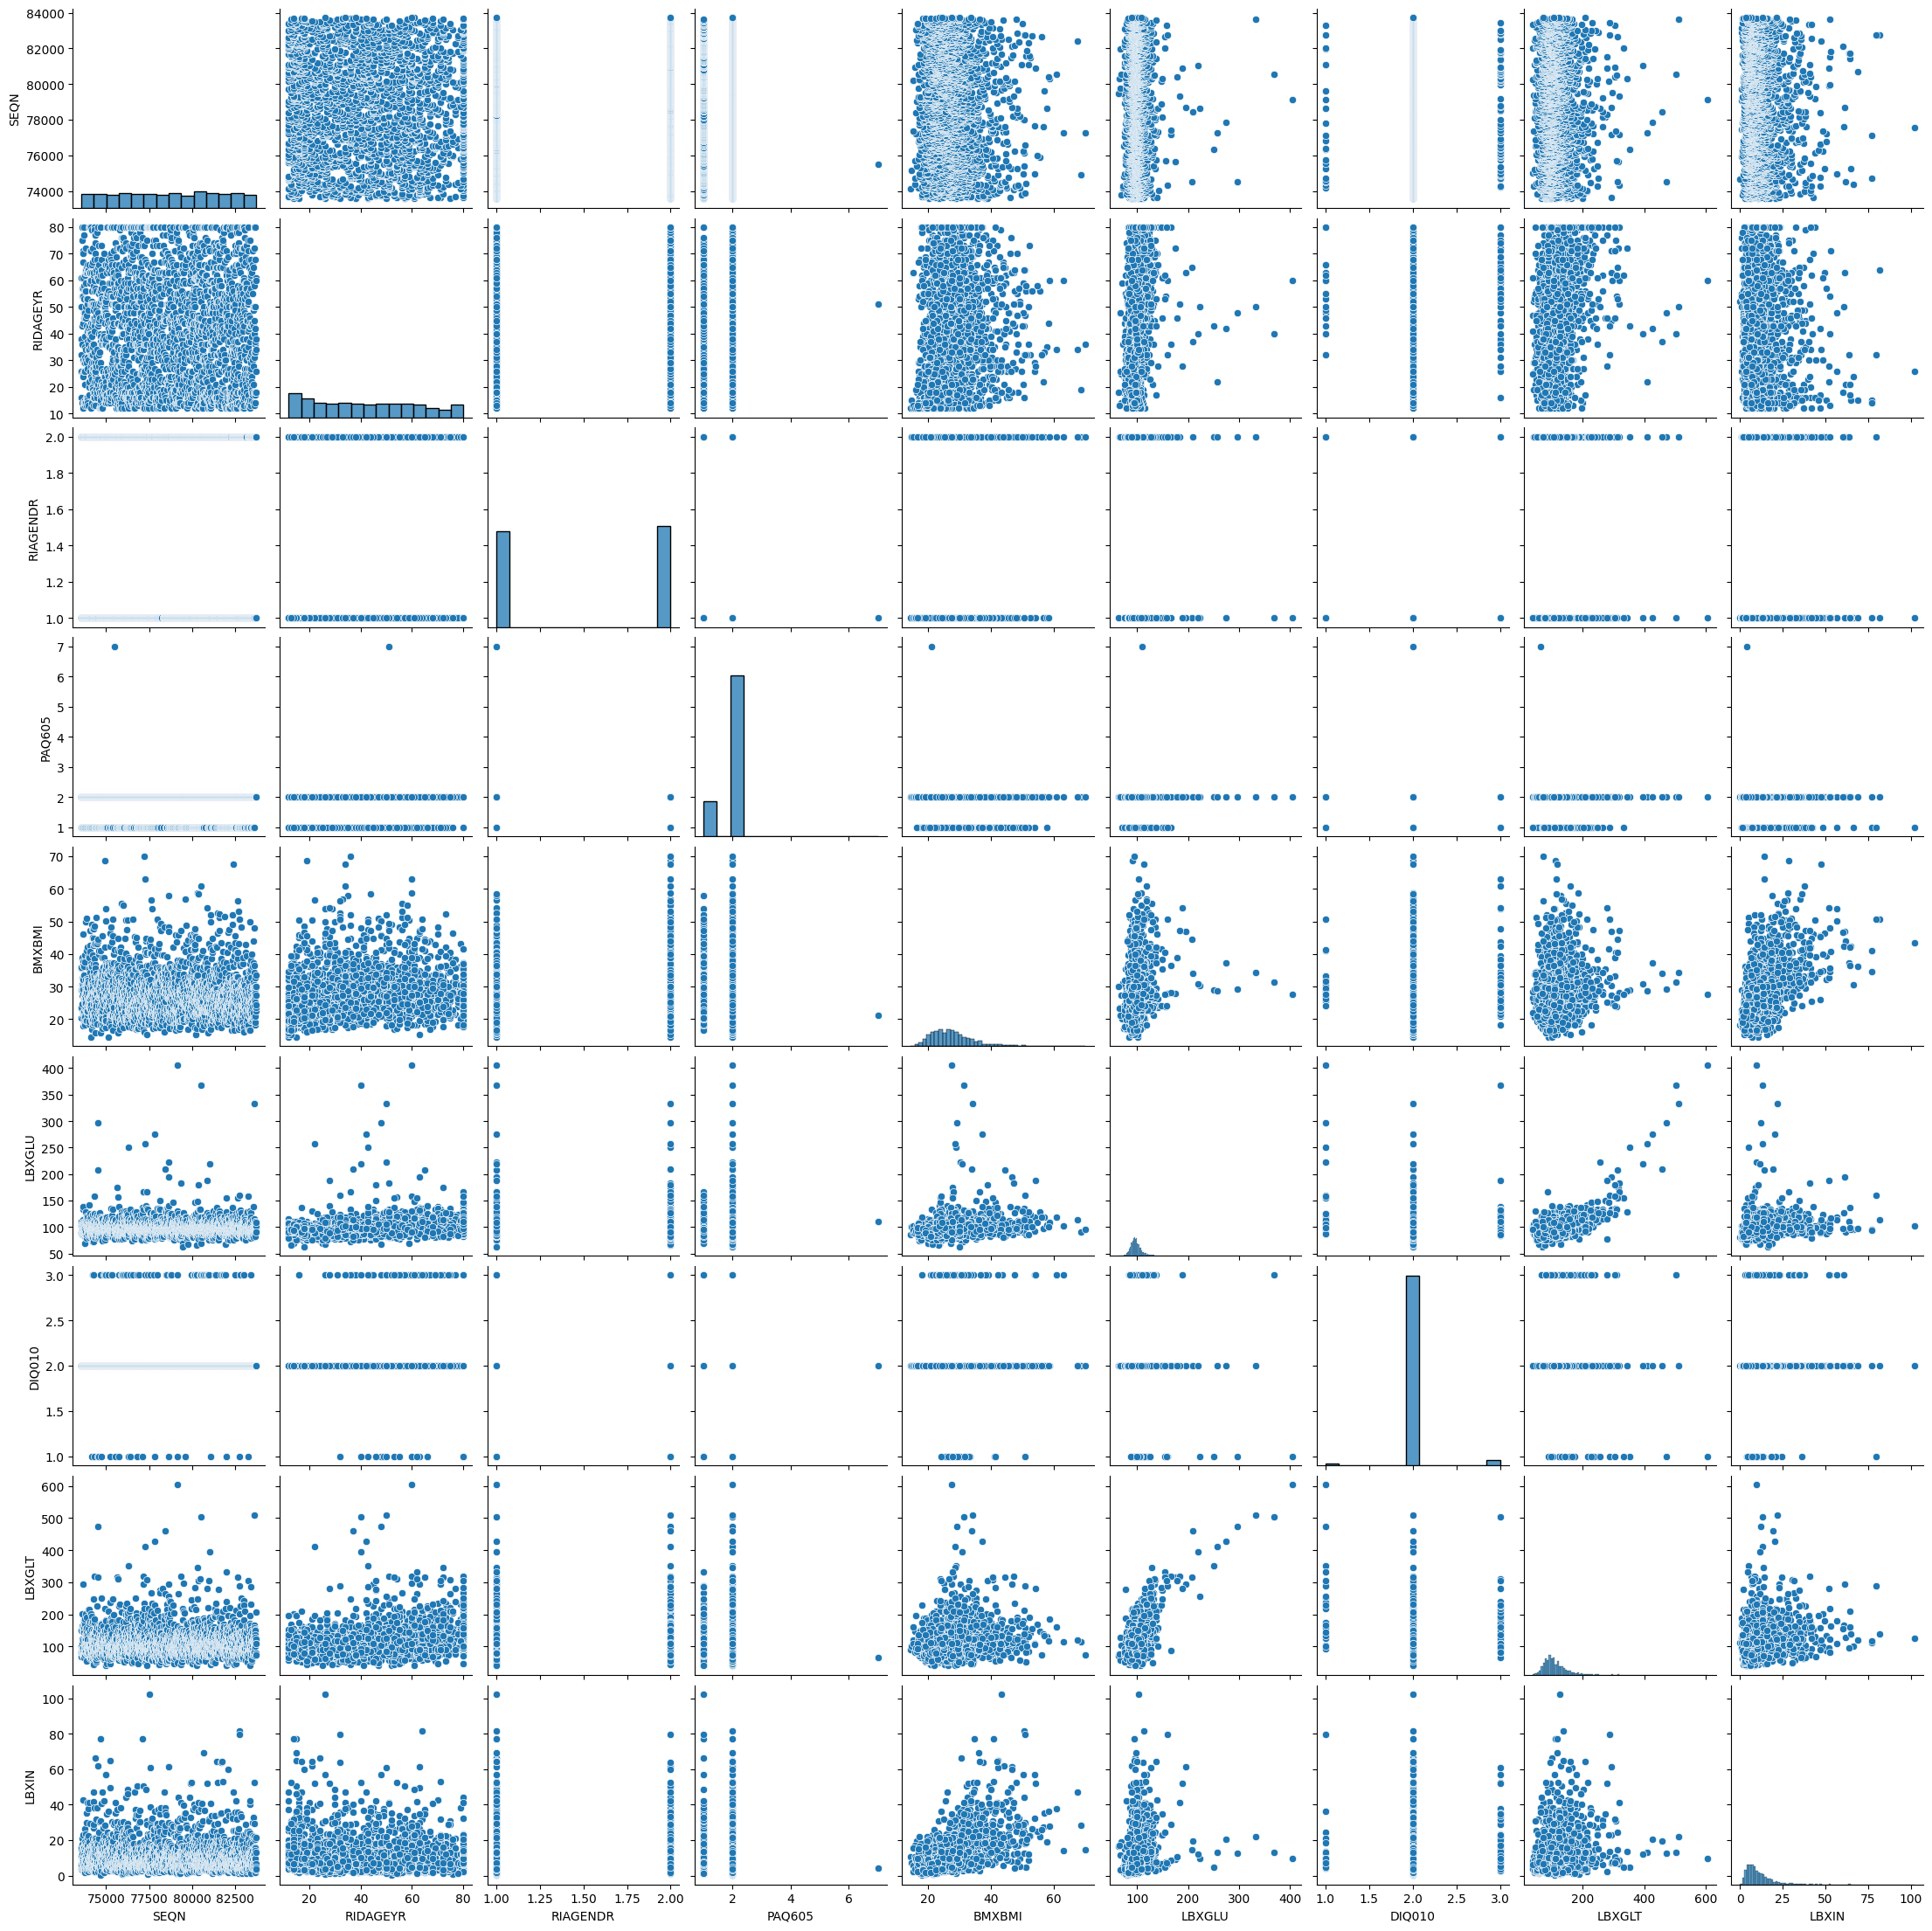

In [7]:
# Visualisasi distribusi beberapa kolom
sns.pairplot(df[['SEQN','RIDAGEYR','RIAGENDR','PAQ605','BMXBMI','LBXGLU','DIQ010','LBXGLT','LBXIN']])
plt.show()

In [8]:
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Matrix Korelasi')
# plt.show()

In [9]:
#Mencek data null
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [10]:
#Mencek data duplikat
df.duplicated().sum()

0

In [11]:
df = df.dropna(axis=0)
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


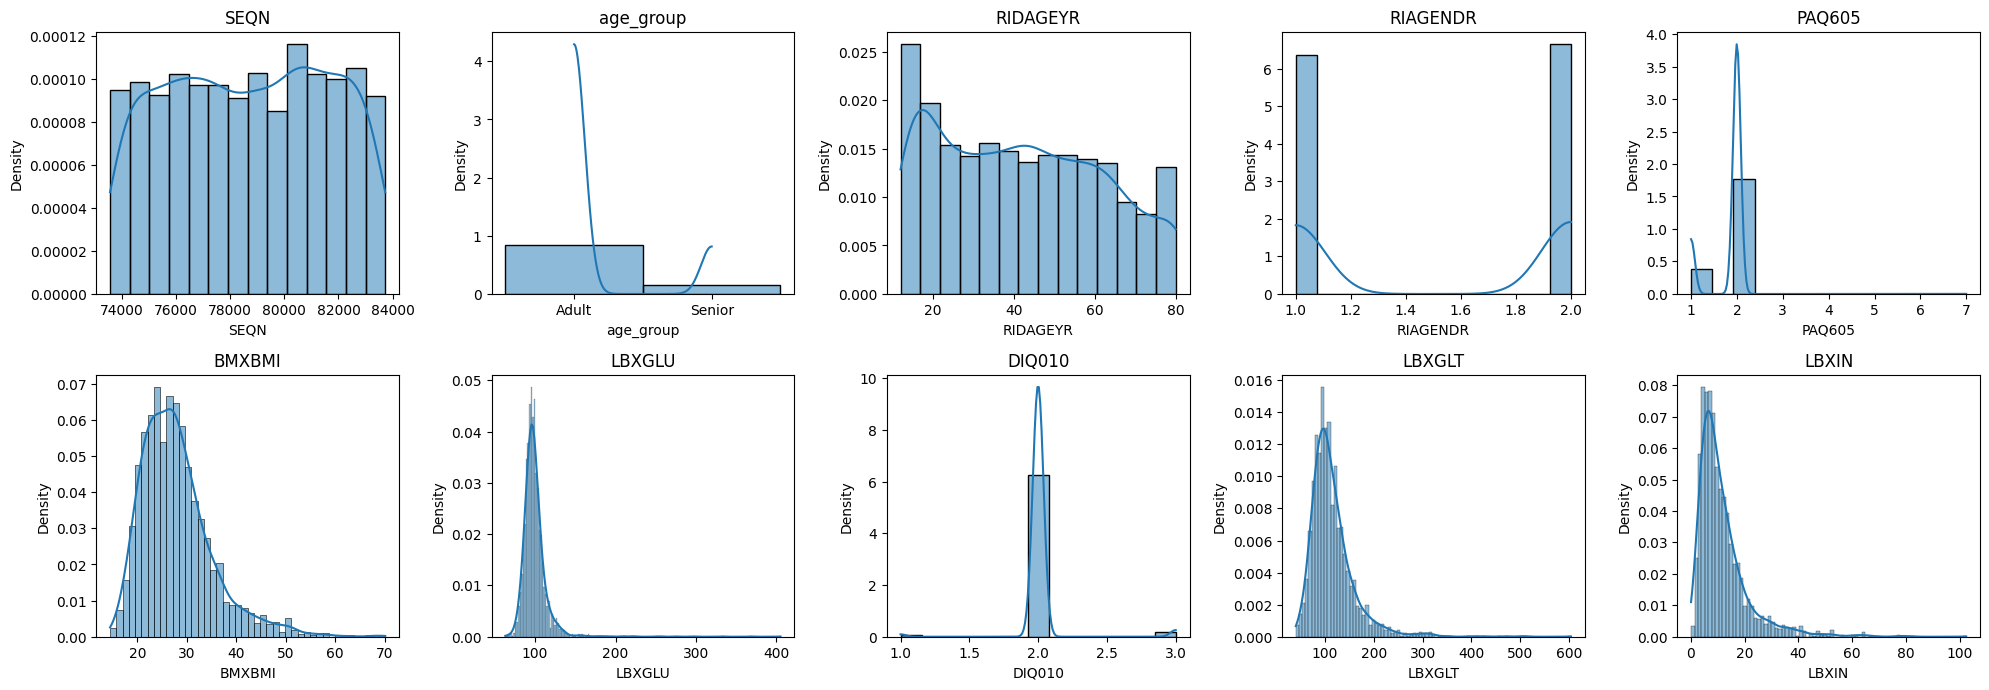

In [12]:
selected_columns = ['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

# Menampilkan histogram dari masing-masing fitur
fig = plt.figure(figsize=(20, 10))
for i, column in enumerate(selected_columns):
    ax = fig.add_subplot(3, 5, i+1)
    sns.histplot(df[column], kde=True, stat='density', ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

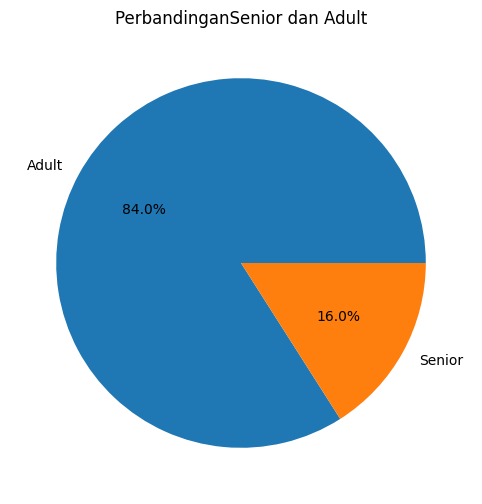

In [13]:
import matplotlib.pyplot as plt

# Menghitung jumlah setiap nilai unik dalam kolom 'age_group'
grade_counts = df['age_group'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10,6))
plt.pie(grade_counts, labels = grade_counts.index, autopct='%1.1f%%')
plt.title('PerbandinganSenior dan Adult')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['age_group'] = label.fit_transform(df['age_group'])

In [15]:
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [16]:
# membagi dataset menjadi data train dengan proporsi 80-20%
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['age_group'])

In [17]:
train

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
129,74186.0,0,29.0,2.0,2.0,16.8,96.0,2.0,86.0,6.26
539,76049.0,0,54.0,1.0,2.0,26.9,94.0,2.0,83.0,5.27
912,77654.0,1,70.0,2.0,2.0,35.3,101.0,2.0,234.0,12.90
65,73884.0,0,43.0,1.0,2.0,30.7,107.0,2.0,96.0,9.59
1773,81486.0,1,74.0,1.0,2.0,27.7,100.0,2.0,126.0,6.24
...,...,...,...,...,...,...,...,...,...,...
2245,83580.0,0,28.0,1.0,2.0,29.8,89.0,2.0,79.0,7.08
254,74731.0,0,27.0,2.0,1.0,32.8,98.0,2.0,114.0,16.59
131,74190.0,0,56.0,2.0,2.0,27.3,92.0,2.0,83.0,7.94
2263,83673.0,0,17.0,2.0,2.0,29.1,90.0,2.0,111.0,9.74


In [18]:
test

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
231,74641.0,0,33.0,1.0,2.0,31.2,91.0,2.0,89.0,5.58
2072,82771.0,0,41.0,1.0,2.0,36.8,106.0,2.0,131.0,8.22
1435,80129.0,1,76.0,1.0,2.0,46.3,108.0,2.0,108.0,8.37
1466,80250.0,1,72.0,1.0,2.0,33.1,110.0,3.0,94.0,8.44
241,74679.0,0,39.0,1.0,1.0,31.5,104.0,2.0,100.0,7.60
...,...,...,...,...,...,...,...,...,...,...
25,73680.0,0,12.0,1.0,2.0,18.0,96.0,2.0,83.0,10.80
326,75066.0,0,44.0,2.0,2.0,26.9,91.0,2.0,126.0,5.39
1023,78174.0,1,67.0,1.0,2.0,27.1,120.0,2.0,194.0,16.90
2024,82550.0,0,34.0,2.0,1.0,33.3,95.0,2.0,77.0,6.36


In [19]:
df2 = train.drop(columns=['age_group'])

In [20]:
X_train = df2
y_train = train['age_group']

In [21]:
df3 = test.drop(columns=['age_group'])

In [22]:
X_test = df3
y_test = test['age_group']

In [23]:
label_counts = y_train.value_counts()
label_counts

0    1531
1     291
Name: age_group, dtype: int64

In [24]:
# # menangani ketidakseimbangan kelas dalam dataset latih
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=23)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=23)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [26]:
X_resampled

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,80061.0,50.0,2.0,2.0,31.4,93.0,2.0,91.0,4.33
1,77436.0,58.0,2.0,2.0,32.0,101.0,2.0,111.0,12.92
2,80816.0,31.0,2.0,2.0,26.0,99.0,2.0,77.0,5.65
3,77474.0,14.0,2.0,2.0,19.5,97.0,2.0,90.0,8.45
4,76018.0,31.0,1.0,1.0,36.7,92.0,2.0,103.0,30.18
...,...,...,...,...,...,...,...,...,...
577,75259.0,80.0,2.0,2.0,25.5,114.0,1.0,236.0,6.53
578,83255.0,80.0,2.0,2.0,21.3,97.0,2.0,96.0,6.50
579,82956.0,72.0,1.0,2.0,17.7,107.0,2.0,102.0,3.18
580,79201.0,75.0,1.0,2.0,27.5,126.0,2.0,265.0,11.81


In [27]:
y_resampled.value_counts()

0    291
1    291
Name: age_group, dtype: int64

In [28]:
y_resampled

0      0
1      0
2      0
3      0
4      0
      ..
577    1
578    1
579    1
580    1
581    1
Name: age_group, Length: 582, dtype: int64

In [29]:
# menggabungkan kembali variabel-variabel prediktor dan variabel target
resampled = pd.concat([X_resampled, y_resampled], axis = 1)

In [30]:
resampled

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,80061.0,50.0,2.0,2.0,31.4,93.0,2.0,91.0,4.33,0
1,77436.0,58.0,2.0,2.0,32.0,101.0,2.0,111.0,12.92,0
2,80816.0,31.0,2.0,2.0,26.0,99.0,2.0,77.0,5.65,0
3,77474.0,14.0,2.0,2.0,19.5,97.0,2.0,90.0,8.45,0
4,76018.0,31.0,1.0,1.0,36.7,92.0,2.0,103.0,30.18,0
...,...,...,...,...,...,...,...,...,...,...
577,75259.0,80.0,2.0,2.0,25.5,114.0,1.0,236.0,6.53,1
578,83255.0,80.0,2.0,2.0,21.3,97.0,2.0,96.0,6.50,1
579,82956.0,72.0,1.0,2.0,17.7,107.0,2.0,102.0,3.18,1
580,79201.0,75.0,1.0,2.0,27.5,126.0,2.0,265.0,11.81,1


In [31]:
# feature_names = X_resampled.columns
# X_resampled.columns

# **Pembuatan Model Baseline**

In [33]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Mendefinisikan hyperparameter yang akan diuji
param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'min_samples_leaf' :[1, 2, 3, 4, 5]
}
#Membuat objek RandomForestClassifier sebagai model dasar yang akan dioptimalkan.
rf = RandomForestClassifier()
#Membuat objek GridSearchCV untuk melakukan pencarian grid
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, refit=True, cv=3, scoring='accuracy', verbose= 3)
grid_rf.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 250 candidates, totalling 750 fits
[CV 1/3] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.2s
[CV 2/3] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.2s
[CV 3/3] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.2s
[CV 1/3] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/3] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.4s
[CV 3/3] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.7s
[CV 1/3] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=1.000 total time=   1.0s
[CV 2/3] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=1.

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=3)

In [35]:
grid_rf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [41]:
best = pd.DataFrame(grid_rf.cv_results_)

# Mengurutkan DataFrame berdasarkan rank_test_score
sort_terbaik = best.sort_values(by='rank_test_score')

# Menampilkan hasil terbaik (lima teratas)
best5 = sort_terbaik.head()

In [42]:
best5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.163026,0.006772,0.008072,0.000139,gini,1,2,100,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",1.0,1.0,1.0,1.0,0.0,1
158,0.635182,0.013894,0.024352,0.000184,entropy,2,4,400,"{'criterion': 'entropy', 'min_samples_leaf': 2...",1.0,1.0,1.0,1.0,0.0,1
159,0.788231,0.000808,0.030185,0.001178,entropy,2,4,500,"{'criterion': 'entropy', 'min_samples_leaf': 2...",1.0,1.0,1.0,1.0,0.0,1
160,0.162469,0.004753,0.009284,0.001115,entropy,2,6,100,"{'criterion': 'entropy', 'min_samples_leaf': 2...",1.0,1.0,1.0,1.0,0.0,1
161,0.324371,0.008974,0.013261,0.000116,entropy,2,6,200,"{'criterion': 'entropy', 'min_samples_leaf': 2...",1.0,1.0,1.0,1.0,0.0,1


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [38]:
y_pred_test = grid_rf.best_estimator_.predict(X_test.values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
print('Accuracy:', accuracy_score(y_test, y_pred_test))
print('F1 score:', f1_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('Precision:', precision_score(y_test, y_pred_test))
print('\n clasification report:\n', classification_report(y_test, y_pred_test))
print('\n confusion matrix:\n', confusion_matrix(y_test,y_pred_test))

Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00        73

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456


 confusion matrix:
 [[383   0]
 [  0  73]]
